<a href="https://colab.research.google.com/github/SwanandKale/AIML_Bootcamp/blob/main/Unveiling_TwitterBot_presence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset='/content/drive/MyDrive/ALML DataSets/bot_detection_data.csv'
import pandas as pd
df = pd.read_csv(dataset)

In [ ]:
df.head()

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention


In [ ]:
df.describe()

,User ID,Retweet Count,Mention Count,Follower Count,Bot Label
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,548890.680540,50.00560,2.513760,4988.602380,0.500360
std,259756.681425,29.18116,1.708563,2878.742898,0.500005
min,100025.000000,0.00000,0.000000,0.000000,0.000000
25%,323524.250000,25.00000,1.000000,2487.750000,0.000000
50%,548147.000000,50.00000,3.000000,4991.500000,1.000000
75%,772983.000000,75.00000,4.000000,7471.000000,1.000000
max,999995.000000,100.00000,5.000000,10000.000000,1.000000


In [ ]:
df.shape

(50000, 11)

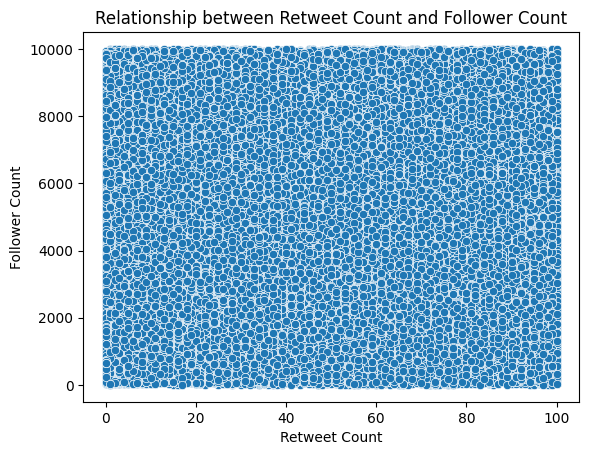

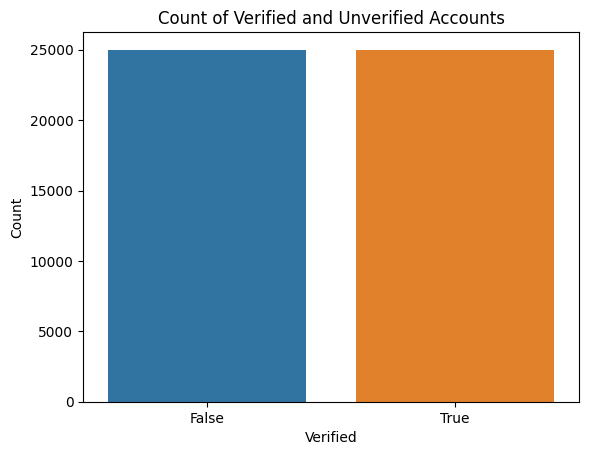

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Keep the desired columns
df = df[['Tweet', 'Username', 'Bot Label', 'Verified', 'Hashtags', 'Follower Count', 'Retweet Count']]

# Visualize the relationship between Retweet Count and Follower Count
sns.scatterplot(data=df, x='Retweet Count', y='Follower Count')
plt.title('Relationship between Retweet Count and Follower Count')
plt.show()

# Count of Verified and Unverified Accounts
sns.countplot(data=df, x='Verified')
plt.title('Count of Verified and Unverified Accounts')
plt.xlabel('Verified')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Label encode the Verified column
label_encoder = LabelEncoder()
df['Verified'] = label_encoder.fit_transform(df['Verified'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Handling missing values
df['Hashtags'].fillna('Unknown', inplace=True)  # Replace missing locations with 'Unknown'

In [ ]:
df.head()

,Tweet,Username,Bot Label,Verified,Hashtags,Follower Count,Retweet Count
0,Station activity person against natural majori...,flong,1,0,Unknown,2353,85
1,Authority research natural life material staff...,hinesstephanie,0,1,both live,9617,55
2,Manage whose quickly especially foot none to g...,roberttran,0,1,phone ahead,4363,6
3,Just cover eight opportunity strong policy which.,pmason,1,1,ever quickly new I,2242,54
4,Animal sign six data good or.,noah87,1,0,foreign mention,8438,26


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all text columns into a single Series
text_data = df['Tweet'] + ' ' + df['Username'] + ' ' + df['Hashtags']

# Text vectorization using TF-IDF (sparse representation)
vectorizer = TfidfVectorizer()
text_sparse = vectorizer.fit_transform(text_data)

In [ ]:
# Keep the desired columns
df = df[['Username','Tweet', 'Verified', 'Hashtags', 'Follower Count', 'Retweet Count', 'Bot Label']]

In [ ]:
df.head()

,Username,Tweet,Verified,Hashtags,Follower Count,Retweet Count,Bot Label
0,flong,Station activity person against natural majori...,0,Unknown,2353,85,1
1,hinesstephanie,Authority research natural life material staff...,1,both live,9617,55,0
2,roberttran,Manage whose quickly especially foot none to g...,1,phone ahead,4363,6,0
3,pmason,Just cover eight opportunity strong policy which.,1,ever quickly new I,2242,54,1
4,noah87,Animal sign six data good or.,0,foreign mention,8438,26,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(text_sparse, df['Bot Label'], test_size=0.2, random_state=42)

# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.4962
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.53      0.51      4968
           1       0.50      0.46      0.48      5032

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [ ]:
# Example: Predict if a new tweet is a bot or not
new_tweet = ["Just cover eight opportunity strong policy which."]
new_tweet_sparse = vectorizer.transform(new_tweet)

prediction = rf_classifier.predict(new_tweet_sparse)

if prediction[0] == 1:
   print("The tweet is predicted to be from a bot.")
else:
   print("The tweet is predicted to be from a non-bot.")

The tweet is predicted to be from a bot.
